Cette page a pour objectif de nettoyer les données du csv sp500_historical_fundamentals

In [1]:
%pip install pynsee

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee
import pynsee.download
import seaborn as sns

/opt/python/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Créons un data frame à partir du CSV

chemin_fichier = '../Collecte de données/sp500_historical_fundamentals.csv'
df_SP500 = pd.read_csv(chemin_fichier)
df_SP500.head()   


,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalization,AnneeFiscale,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
0,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2024,...,0.085023,4.44,129.261505,1.289000e+09,6.510000e+09,5.898000e+09,1.184600e+10,3.390000e+09,0.956,4.310391e+08
1,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2023,...,0.068595,4.22,101.847656,1.240000e+09,6.833000e+09,5.845000e+09,1.076300e+10,2.735000e+09,0.911,4.612575e+08
2,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2022,...,0.069448,4.19,135.356216,1.254000e+09,6.848000e+09,5.305000e+09,1.053200e+10,2.769000e+09,1.065,4.272828e+08
3,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2021,...,0.068445,3.98,152.683533,1.210000e+09,6.319000e+09,5.389000e+09,1.070500e+10,2.729000e+09,0.776,4.077569e+08
4,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113459052544,2024,...,0.025922,6.11,231.696014,9.373600e+10,3.910350e+11,5.695000e+10,3.649800e+11,1.066290e+11,0.990,1.435143e+10


In [4]:
df_SP500.shape

(1966, 24)

In [5]:
differences_ticker_nom = df_SP500[df_SP500['Ticker'] != df_SP500['Nom']]
differences_yahoo_nom = df_SP500[df_SP500['YahooTicker'] != df_SP500['Nom']]
differences_ticker_yahoo = df_SP500[df_SP500['Ticker'] != df_SP500['YahooTicker']]
print(differences_ticker_yahoo)
print(differences_yahoo_nom)
print(differences_ticker_nom)

Empty DataFrame
Columns: [Ticker, YahooTicker, Nom, Zone, Sector, Industry, Country, Beta, MarketCapitalization, AnneeFiscale, DateRapport, PER_calcule, ROE_calcule, ROA_calcule, DebtToEquity_calcule, EPS, EOD_Close_Price, NetIncome, TotalRevenue, TotalEquity, TotalAssets, TotalDebt, Dividendes_Annuels, Annual_Volume_Traded]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [Ticker, YahooTicker, Nom, Zone, Sector, Industry, Country, Beta, MarketCapitalization, AnneeFiscale, DateRapport, PER_calcule, ROE_calcule, ROA_calcule, DebtToEquity_calcule, EPS, EOD_Close_Price, NetIncome, TotalRevenue, TotalEquity, TotalAssets, TotalDebt, Dividendes_Annuels, Annual_Volume_Traded]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [Ticker, YahooTicker, Nom, Zone, Sector, Industry, Country, Beta, MarketCapitalization, AnneeFiscale, DateRapport, PER_calcule, ROE_calcule, ROA_calcule, DebtToEquity_calcule, EPS, EOD_Close_Price, NetIncome, TotalRevenue, TotalEquity, TotalAssets, TotalD

On remarque que les colonnes "Ticker", "YahooTicker" et "Nom" sont égales. Cependant on garde les trois colonnes car elles vont permettre d'établir des comparaisons avec le df_STX600.

Commençons donc par traiter les NaN.

In [6]:
# on affiche les lignes qui contiennent au moins un NaN
df_SP500[df_SP500.isna().any(axis=1)]

,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalization,AnneeFiscale,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
7,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113459052544,2021,...,NaN,NaN,138.390701,NaN,NaN,NaN,NaN,NaN,0.865,2.274814e+10
12,ABNB,ABNB,ABNB,USA,Consumer Cyclical,Travel Services,United States,1.118,76768231424,2024,...,0.029882,4.19,131.410004,2.648000e+09,1.110200e+10,8.412000e+09,2.095900e+10,2.294000e+09,NaN,1.134484e+09
13,ABNB,ABNB,ABNB,USA,Consumer Cyclical,Travel Services,United States,1.118,76768231424,2023,...,0.030012,7.52,134.479996,4.792000e+09,9.917000e+09,8.165000e+09,2.064500e+10,2.304000e+09,NaN,1.545427e+09
14,ABNB,ABNB,ABNB,USA,Consumer Cyclical,Travel Services,United States,1.118,76768231424,2022,...,0.030494,2.97,84.900002,1.893000e+09,8.399000e+09,5.560000e+09,1.603800e+10,2.341000e+09,NaN,1.618238e+09
15,ABNB,ABNB,ABNB,USA,Consumer Cyclical,Travel Services,United States,1.118,76768231424,2021,...,0.031497,-0.57,166.490005,-3.520000e+08,5.992000e+09,4.775000e+09,1.370800e+10,2.418000e+09,NaN,1.638642e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,XYZ,XYZ,XYZ,USA,Technology,Software - Infrastructure,United States,2.658,37532086272,2021,...,0.146974,0.36,161.509995,1.662840e+08,1.766120e+10,3.272855e+09,1.502636e+10,5.516240e+09,NaN,2.252079e+09
1958,ZBRA,ZBRA,ZBRA,USA,Technology,Communication Equipment,United States,1.675,13486168064,2024,...,0.175142,10.25,386.220001,5.280000e+08,4.981000e+09,3.586000e+09,7.968000e+09,2.362000e+09,NaN,8.958350e+07
1959,ZBRA,ZBRA,ZBRA,USA,Technology,Communication Equipment,United States,1.675,13486168064,2023,...,0.178998,5.75,267.980011,2.960000e+08,4.584000e+09,3.036000e+09,7.306000e+09,2.414000e+09,NaN,1.011659e+08
1960,ZBRA,ZBRA,ZBRA,USA,Technology,Communication Equipment,United States,1.675,13486168064,2022,...,0.163056,8.86,260.200012,4.630000e+08,5.781000e+09,2.733000e+09,7.529000e+09,2.199000e+09,NaN,1.117056e+08


In [7]:
df_SP500[df_SP500.isna().any(axis=1)].shape

(499, 24)

On remarque que dans notre dataframe, lorsqu'une entreprise n'a pas émis de dividendes pendant une année, la valeur prise par la colonne Dividendes_Annuels est NaN. Il convient de la remplacer par 0. 

In [8]:
df_SP500['Dividendes_Annuels'] = df_SP500['Dividendes_Annuels'].fillna(0)
df_SP500.head()

,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalization,AnneeFiscale,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
0,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2024,...,0.085023,4.44,129.261505,1.289000e+09,6.510000e+09,5.898000e+09,1.184600e+10,3.390000e+09,0.956,4.310391e+08
1,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2023,...,0.068595,4.22,101.847656,1.240000e+09,6.833000e+09,5.845000e+09,1.076300e+10,2.735000e+09,0.911,4.612575e+08
2,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2022,...,0.069448,4.19,135.356216,1.254000e+09,6.848000e+09,5.305000e+09,1.053200e+10,2.769000e+09,1.065,4.272828e+08
3,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39871500288,2021,...,0.068445,3.98,152.683533,1.210000e+09,6.319000e+09,5.389000e+09,1.070500e+10,2.729000e+09,0.776,4.077569e+08
4,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113459052544,2024,...,0.025922,6.11,231.696014,9.373600e+10,3.910350e+11,5.695000e+10,3.649800e+11,1.066290e+11,0.990,1.435143e+10


Regardons de nouveau les lignes avec des NaN maintenant que les dividendes ont été traités.

In [9]:
df_SP500[df_SP500.isna().any(axis=1)].head()

,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalization,AnneeFiscale,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
7,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113459052544,2021,...,NaN,NaN,138.390701,NaN,NaN,NaN,NaN,NaN,0.865,2.274814e+10
27,ACN,ACN,ACN,USA,Technology,Information Technology Services,Ireland,1.261,167877476352,2021,...,NaN,9.31,316.200073,NaN,NaN,NaN,NaN,NaN,3.610,5.006449e+08
35,ADI,ADI,ADI,USA,Technology,Semiconductors,United States,1.039,135262044160,2021,...,NaN,NaN,162.407196,NaN,NaN,NaN,NaN,NaN,2.760,8.831331e+08
46,ADSK,ADSK,ADSK,USA,Technology,Software - Application,United States,1.475,64059748352,2021,...,NaN,NaN,286.320007,NaN,NaN,NaN,NaN,NaN,0.000,3.401028e+08
98,AMAT,AMAT,AMAT,USA,Technology,Semiconductor Equipment & Materials,United States,1.666,212815069184,2021,...,0.027033,NaN,134.333969,5.888000e+09,2.306300e+10,1.224700e+10,2.582500e+10,5.753000e+09,0.940,2.047500e+09


In [10]:
df_SP500[df_SP500.isna().any(axis=1)].shape

(105, 24)

On est passé de 497 lignes avec des NaN à 105. Regardons qui sont ces sociétés. 

In [11]:
societes_avec_nan = df_SP500.loc[df_SP500.isna().any(axis=1), "Nom"].unique()
print(societes_avec_nan)
print(len(societes_avec_nan), "sociétés avec au moins un NaN")

['AAPL' 'ACN' 'ADI' 'ADSK' 'AMAT' 'AMCR' 'ANET' 'APD' 'AZO' 'BDX' 'BEN'
 'CAG' 'CAH' 'CEG' 'CLX' 'COO' 'COR' 'COST' 'CPB' 'CPRT' 'CTAS' 'DE'
 'DELL' 'DIS' 'DLTR' 'DRI' 'EA' 'ERIE' 'FDX' 'FISV' 'FOX' 'FOXA' 'GEHC'
 'GEN' 'GEV' 'HD' 'HOLX' 'HPQ' 'HRL' 'INTU' 'ISRG' 'JCI' 'KEYS' 'KLAC'
 'KR' 'KVUE' 'LOW' 'LW' 'MCHP' 'MCK' 'MNST' 'MPWR' 'MU' 'NKE' 'NTAP' 'NWS'
 'NWSA' 'ORCL' 'PANW' 'PH' 'PTC' 'Q' 'QCOM' 'RL' 'RMD' 'ROK' 'SBUX' 'SJM'
 'SNDK' 'SOLS' 'SOLV' 'STE' 'STX' 'STZ' 'SWKS' 'TDG' 'TEL' 'TGT' 'TJX'
 'TKO' 'TTWO' 'ULTA' 'VLTO' 'WMT' 'WSM']
85 sociétés avec au moins un NaN


On remarque que lorsqu'il y a une ligne avec un NaN, la majorité du temps il y a plusieurs NaN sur cette même ligne. On peut supposer que ce sont des entreprises qui n'étaient pas cotées cette année là ou bien que les données n'étaient pas disponible sur YahooFinance. Cela ne concerne que 103 lignes sur 1966, soit 5% du data frame. De plus, il n'est pas cohérent de remplacer ces NaN par une valeur moyenne ou médiane car nous nous intéressons aux spécificités de chaque entreprise. On fait donc le choix de supprimer ces 103 lignes.

In [12]:
df_SP500.dropna(inplace=True)

# Vérifier qu'il n'y a plus aucun NaN
print(df_SP500.isna().sum().sum())  # doit retourner 0

# Afficher les dimensions après nettoyage
print(df_SP500.shape)

0
(1861, 24)


Maintenant que l'on a géré les NaN, pour le confort on va convertir en milliards les colonnes "NetIncome", "TotalRevenue", "TotalEquity", "TotalAssets", "TotalDebt" et "Annual_Volume_Traded".

In [13]:
colonnes_milliards = ["NetIncome", "TotalRevenue", "TotalEquity", "TotalAssets", "TotalDebt", "Annual_Volume_Traded", "MarketCapitalization"]
df_SP500[colonnes_milliards] = df_SP500[colonnes_milliards] / 1e9
# On renomme les colonnes
df_SP500 = df_SP500.rename(columns={
    'NetIncome': 'NetIncomeBN',
    'TotalRevenue': 'TotalRevenueBN',
    'TotalEquity': 'TotalEquityBN',
    'TotalAssets': 'TotalAssetsBN',
    'TotalDebt': 'TotalDebtBN',
    "Annual_Volume_Traded": "Annual_Volume_Traded_BN",
    "MarketCapitalization": "MarketCapitalizationBN"

})

# Vérifier
df_SP500.head()

,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalizationBN,AnneeFiscale,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN
0,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2024,...,0.085023,4.44,129.261505,1.289,6.510,5.898,11.846,3.390,0.956,0.431039
1,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2023,...,0.068595,4.22,101.847656,1.240,6.833,5.845,10.763,2.735,0.911,0.461257
2,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2022,...,0.069448,4.19,135.356216,1.254,6.848,5.305,10.532,2.769,1.065,0.427283
3,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2021,...,0.068445,3.98,152.683533,1.210,6.319,5.389,10.705,2.729,0.776,0.407757
4,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113.459053,2024,...,0.025922,6.11,231.696014,93.736,391.035,56.950,364.980,106.629,0.990,14.351428


Dans notre data frame, on a des entreprises de différentes nationalités, pour ne pas avoir de problème de comparaison entre les monnaies, on va s'intéresser à des ratios plutôt qu'à des valeurs bruttes.

Ajoutons d'abord une colonne correspondant à la marge nette qui est un indicateur utile de la performance des entreprises.

In [14]:
df_SP500["%MargeNette"] = df_SP500["NetIncomeBN"] / df_SP500["TotalRevenueBN"]*100
print(df_SP500[["Nom", "NetIncomeBN", "TotalRevenueBN", "%MargeNette"]].head())

    Nom  NetIncomeBN  TotalRevenueBN  %MargeNette
0     A        1.289           6.510    19.800307
1     A        1.240           6.833    18.147227
2     A        1.254           6.848    18.311916
3     A        1.210           6.319    19.148599
4  AAPL       93.736         391.035    23.971256


Ajoutons maintenant le Gearing ratio qui permet d'évaluer la structure financière de l'entreprise.

In [15]:
df_SP500["%Gearing"] = df_SP500["TotalDebtBN"] / df_SP500["TotalEquityBN"]*100
print(df_SP500[["Nom", "TotalDebtBN", "TotalEquityBN", "%Gearing"]].head())

    Nom  TotalDebtBN  TotalEquityBN    %Gearing
0     A        3.390          5.898   57.477111
1     A        2.735          5.845   46.792130
2     A        2.769          5.305   52.196041
3     A        2.729          5.389   50.640193
4  AAPL      106.629         56.950  187.232660


Ajoutons enfin le pay out ratio qui permet d'analyser la politique de redistribution de dividendes des entreprises. 

In [16]:
df_SP500["%PayOut"] = df_SP500["Dividendes_Annuels"] / df_SP500["EPS"]*100
print(df_SP500[["Nom", "Dividendes_Annuels", "EPS", "%PayOut"]].head())

    Nom  Dividendes_Annuels   EPS    %PayOut
0     A               0.956  4.44  21.531532
1     A               0.911  4.22  21.587678
2     A               1.065  4.19  25.417661
3     A               0.776  3.98  19.497487
4  AAPL               0.990  6.11  16.202946


In [17]:
# Liste du nom des colonnes
print(df_SP500.columns.tolist())

['Ticker', 'YahooTicker', 'Nom', 'Zone', 'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN', 'AnneeFiscale', 'DateRapport', 'PER_calcule', 'ROE_calcule', 'ROA_calcule', 'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN', 'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN', 'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette', '%Gearing', '%PayOut']


Regardons maintenant si nous avons dans notre df des valeurs aberrantes. En général, un PER prend des valeurs entre 0 et 50. 
Un PER de x signifie que pour acheter une action, l'actionnaire paye x fois le bénéfice attribuable à son action. Ainsi, on comprend que les PER négatif ne sont pas significatifs et sont dus à un bénéfice négatif. Un PER trop élevé est du à un résultat net proche de 0 et donc un ratio PER = Valeur des capitaux propres / Résultat Net égal à l'infini. De tels PER ne sont pas non plus significatifs. 

In [18]:
df_SP500['PER_calcule'].describe()

count    1861.000000
mean       32.220887
std       178.763768
min     -2544.428580
25%        12.797288
50%        21.132750
75%        32.192400
max      4091.142927
Name: PER_calcule, dtype: float64

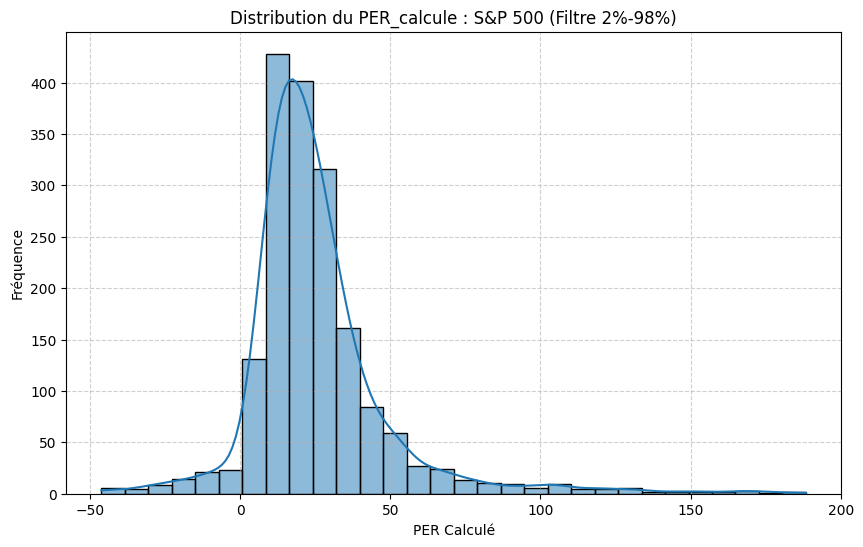

In [19]:
# Regardons la distribution de nos PER

def afficher_distribution(df, nom_dataset):
    plt.figure(figsize=(10, 6))

    # On a observé des outliers pour améliorer la visualisation on ne garde que les données entre 2% et 98% 
    q_low = df['PER_calcule'].quantile(0.02)
    q_high = df['PER_calcule'].quantile(0.98)
    df_filtered = df[(df['PER_calcule'] > q_low) & (df['PER_calcule'] < q_high)]

    sns.histplot(df_filtered['PER_calcule'], kde=True, bins=30)
    plt.title(f'Distribution du PER_calcule : {nom_dataset} (Filtre 2%-98%)')
    plt.xlabel('PER Calculé')
    plt.ylabel('Fréquence')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

afficher_distribution(df_SP500, "S&P 500")

On remarque que la majorité des valeurs sont comprises entre 0 et 50 mais il y a tout de même des valeurs aberrantes qui compliquent l'étude. On se retreint dans le cadre de notre projet à l'analyse des PER entre 0 et 50, on va donc retirer les lignes avec un PER aberrant. 

In [20]:
# Nombre de lignes avant nettoyage
print(f"Nombre de lignes avant nettoyage SP500 : {len(df_SP500)}")

# On ne garde que les PER entre 0 et 50
df_SP500 = df_SP500[
    (df_SP500['PER_calcule'] >= 0) & 
    (df_SP500['PER_calcule'] <= 50)
]

# Vérifions le nombre de lignes supprimées et la nouvelle distribution du PER nettoyé
print(f"Nombre de lignes après nettoyage SP500 : {len(df_SP500)}")
print("Statistiques du PER après nettoyage SP500 :")
print(df_SP500['PER_calcule'].describe())

print("-" * 30)

Nombre de lignes avant nettoyage SP500 : 1861
Nombre de lignes après nettoyage SP500 : 1534
Statistiques du PER après nettoyage SP500 :
count    1534.000000
mean       21.584044
std        10.434821
min         2.004740
25%        13.470064
50%        20.129570
75%        28.588283
max        49.714777
Name: PER_calcule, dtype: float64
------------------------------


Il nous reste 1536 lignes contre au départ 1966 soit 78% du jeu de données. Ces 78% sont significatifs et nous permettent de mener une étude sérieuse. 

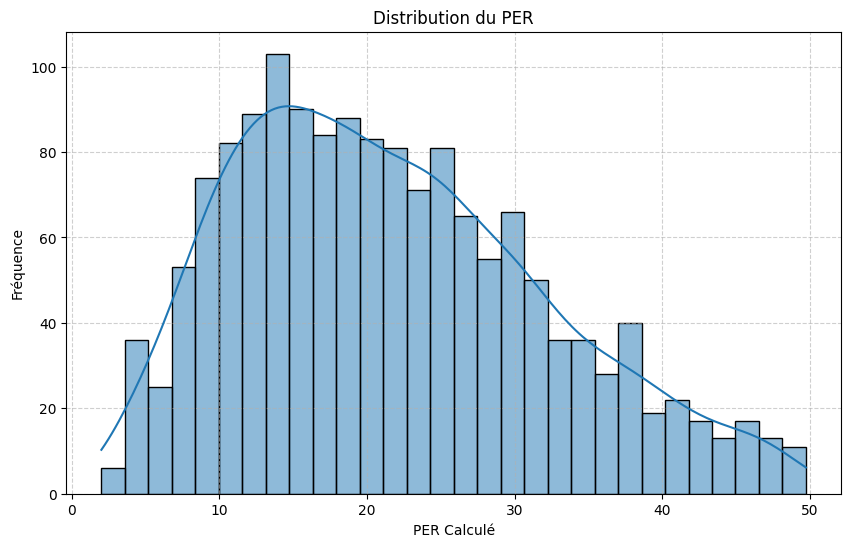

In [21]:
# Regardons maintenant la distribution de nos PER

def afficher_distribution2(df, nom_dataset):
    plt.figure(figsize=(10, 6))

    sns.histplot(df_SP500['PER_calcule'], kde=True, bins=30)
    plt.title('Distribution du PER')
    plt.xlabel('PER Calculé')
    plt.ylabel('Fréquence')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

afficher_distribution2(df_SP500, "S&P 500")

Nous avons maintenant un data frame que nous pouvons utiliser pour mener notre étude.

In [22]:
df_SP500.head(50)

,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalizationBN,AnneeFiscale,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2024,...,1.289000,6.510000,5.898000,11.846000,3.390000,0.956,0.431039,19.800307,57.477111,21.531532
1,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2023,...,1.240000,6.833000,5.845000,10.763000,2.735000,0.911,0.461257,18.147227,46.792130,21.587678
2,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2022,...,1.254000,6.848000,5.305000,10.532000,2.769000,1.065,0.427283,18.311916,52.196041,25.417661
3,A,A,A,USA,Healthcare,Diagnostics & Research,United States,1.274,39.871500,2021,...,1.210000,6.319000,5.389000,10.705000,2.729000,0.776,0.407757,19.148599,50.640193,19.497487
4,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113.459053,2024,...,93.736000,391.035000,56.950000,364.980000,106.629000,0.990,14.351428,23.971256,187.232660,16.202946
5,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113.459053,2023,...,96.995000,383.285000,62.146000,352.583000,111.088000,0.950,14.805887,25.306234,178.753258,15.422078
6,AAPL,AAPL,AAPL,USA,Technology,Consumer Electronics,United States,1.107,4113.459053,2022,...,99.803000,394.328000,50.672000,352.755000,132.480000,0.910,22.065504,25.309641,261.446164,14.796748
10,ABBV,ABBV,ABBV,USA,Healthcare,Drug Manufacturers - General,United States,0.349,394.109092,2022,...,11.836000,58.054000,17.254000,138.805000,63.271000,5.640,1.623064,20.387915,366.703373,84.303673
11,ABBV,ABBV,ABBV,USA,Healthcare,Drug Manufacturers - General,United States,0.349,394.109092,2021,...,11.542000,56.197000,15.408000,146.529000,76.684000,5.200,1.714585,20.538463,497.689512,79.668652
12,ABNB,ABNB,ABNB,USA,Consumer Cyclical,Travel Services,United States,1.118,76.768231,2024,...,2.648000,11.102000,8.412000,20.959000,2.294000,0.000,1.134484,23.851558,27.270566,0.000000


Enfin, on va ajouter une colonne qui calcule la croissance de l'EPS d'une année sur l'autre. Notons que les données ne seront pas disponibles pour l'année 2021 ni quand l'année précédente a été cleanée du sata set. C'est un bon indicateur mais qui sera limité dans le cadre de notre jeu de données.

In [23]:
# Sort the DataFrame by Ticker and AnneeFiscale to ensure correct year-over-year calculation
df_SP500 = df_SP500.sort_values(by=['Ticker', 'AnneeFiscale'])

# Calculate the year-over-year EPS growth for each company
df_SP500['Croissance de l\'EPS (en %)'] = df_SP500.groupby('Ticker')['EPS'].pct_change() * 100 #fonction pour calculer la xce yoy

# Display the relevant columns to show the new calculation
display(df_SP500[['Ticker', 'AnneeFiscale', 'EPS', 'Croissance de l\'EPS (en %)']].head(10))

,Ticker,AnneeFiscale,EPS,Croissance de l'EPS (en %)
3,A,2021,3.980000,NaN
2,A,2022,4.190000,5.276382
1,A,2023,4.220000,0.715990
0,A,2024,4.440000,5.213270
6,AAPL,2022,6.150000,NaN
5,AAPL,2023,6.160000,0.162602
4,AAPL,2024,6.110000,-0.811688
11,ABBV,2021,6.527034,NaN
10,ABBV,2022,6.690100,2.498317
14,ABNB,2022,2.970000,NaN


Enfin, regardons s'il y a des lignes en double. Cela serait possible notamment si une entreprise émet plusieurs classes d'actions, et donc qu'elle est trouvable sous deux tickers distincts. Pour étudier les doublons, regardons les entreprises qui ont le même NetIncome et le même EPS. (On ne peut pas regarder si elles ont le même tickers puisque tout le problème vient du fait qu'elles ont deux tickers distincts).

In [24]:
# 2. On repère les doublons sur la combinaison (NetIncomeBN, PER)
# On passe une liste de colonnes à 'subset'
masque_doublons = df_SP500.duplicated(subset=['NetIncomeBN', 'Beta'], keep=False)

# 3. On filtre le DataFrame et on trie par les DEUX colonnes pour grouper les paires
resultat = df_SP500[masque_doublons].sort_values(by=['NetIncomeBN', 'Beta'])

print(f"Nombre de lignes concernées : {len(resultat)}")
# On affiche le résultat (on peut utiliser display() si tu es dans un notebook Jupyter)
resultat.head(30)

Nombre de lignes concernées : 18


,Ticker,YahooTicker,Nom,Zone,Sector,Industry,Country,Beta,MarketCapitalizationBN,AnneeFiscale,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
1121,LUV,LUV,LUV,USA,Industrials,Airlines,United States,1.167,20.035912,2023,...,26.091,10.515,36.487,9.200,0.90,1.854596,1.782224,87.494056,107.142857,-7.692308
1120,LUV,LUV,LUV,USA,Industrials,Airlines,United States,1.167,20.035912,2024,...,27.483,10.350,33.750,8.058,0.72,2.245677,1.691955,77.855072,92.307692,-7.142857
1343,NWS,NWS,NWS,USA,Communication Services,Entertainment,United States,0.973,16.421116,2022,...,10.385,8.222,17.221,4.155,0.20,0.183847,5.999037,50.535150,18.867925,NaN
1347,NWSA,NWSA,NWSA,USA,Communication Services,Entertainment,United States,0.973,15.137602,2022,...,10.385,8.222,17.221,4.155,0.20,0.723795,5.999037,50.535150,18.867925,NaN
741,FOX,FOX,FOX,USA,Communication Services,Entertainment,United States,0.512,29.290768,2022,...,13.974,11.339,22.185,7.718,0.49,0.287095,8.623157,68.065967,23.222749,NaN
745,FOXA,FOXA,FOXA,USA,Communication Services,Entertainment,United States,0.512,31.209175,2022,...,13.974,11.339,22.185,7.718,0.49,0.726125,8.623157,68.065967,23.222749,NaN
740,FOX,FOX,FOX,USA,Communication Services,Entertainment,United States,0.512,29.290768,2023,...,14.913,10.378,21.866,8.207,0.51,0.314051,8.308187,79.080748,21.888412,10.426540
744,FOXA,FOXA,FOXA,USA,Communication Services,Entertainment,United States,0.512,31.209175,2023,...,14.913,10.378,21.866,8.207,0.51,0.915784,8.308187,79.080748,21.888412,10.426540
739,FOX,FOX,FOX,USA,Communication Services,Entertainment,United States,0.512,29.290768,2024,...,13.980,10.714,21.972,8.152,0.53,0.276445,10.736767,76.087362,16.932907,34.334764
743,FOXA,FOXA,FOXA,USA,Communication Services,Entertainment,United States,0.512,31.209175,2024,...,13.980,10.714,21.972,8.152,0.53,0.788613,10.736767,76.087362,16.932907,34.334764


Il faut drop les lignes 1347, 745, 744, 743, 811, 810, 812 et 809 de df_SP500. 

In [25]:
indices_a_supprimer = [1347, 745, 744, 743, 811, 810, 812, 809]

# On supprime les lignes (axis=0 par défaut)
# errors='ignore' permet d'éviter une erreur si une de ces lignes a déjà été supprimée
df_SP500 = df_SP500.drop(indices_a_supprimer, errors='ignore')

# Vérification simple
print(f"Nouvelle taille du DataFrame : {df_SP500.shape}")

Nouvelle taille du DataFrame : (1526, 28)


In [26]:
import os

# On sauvegarde dans le même dossier que le notebook actuel
# index=False : évite de créer une colonne pour les numéros de ligne (0, 1, 2...)
# encoding='utf-8-sig' : assure que les accents s'affichent bien (surtout pour Excel)
df_SP500.to_csv("df_SP500_clean.csv", index=False, encoding='utf-8-sig')

print("Fichier CSV sauvegardé avec succès !")

Fichier CSV sauvegardé avec succès !
